In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import IPython.display as ipd
import sklearn

In [2]:
# Load the WAV file
#audio_file = "./101_mono.wav"

#y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sampling rate

#Display audio
#ipd.Audio(audio_file)

C:\Users\junio\AppData\Local\Temp\ipykernel_28108\3285463863.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sampling rate
C:\Users\junio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: './101_mono.wav'

In [3]:
def generate_fake_audio(duration, sample_rate):
    """
    Generate fake audio data.

    Args:
    - duration (float): Duration of the audio signal in seconds.
    - sample_rate (int): Sampling rate of the audio signal.

    Returns:
    - numpy.ndarray: Fake audio data.
    """
    # Calculate the number of samples
    num_samples = int(duration * sample_rate)

    # Generate a random audio signal (e.g., white noise)
    audio_data = np.random.normal(0, 1, num_samples)

    return audio_data

# Example usage:
duration = 5  # 5 seconds
sample_rate = 44100  # 44.1 kHz
y = generate_fake_audio(duration, sample_rate)

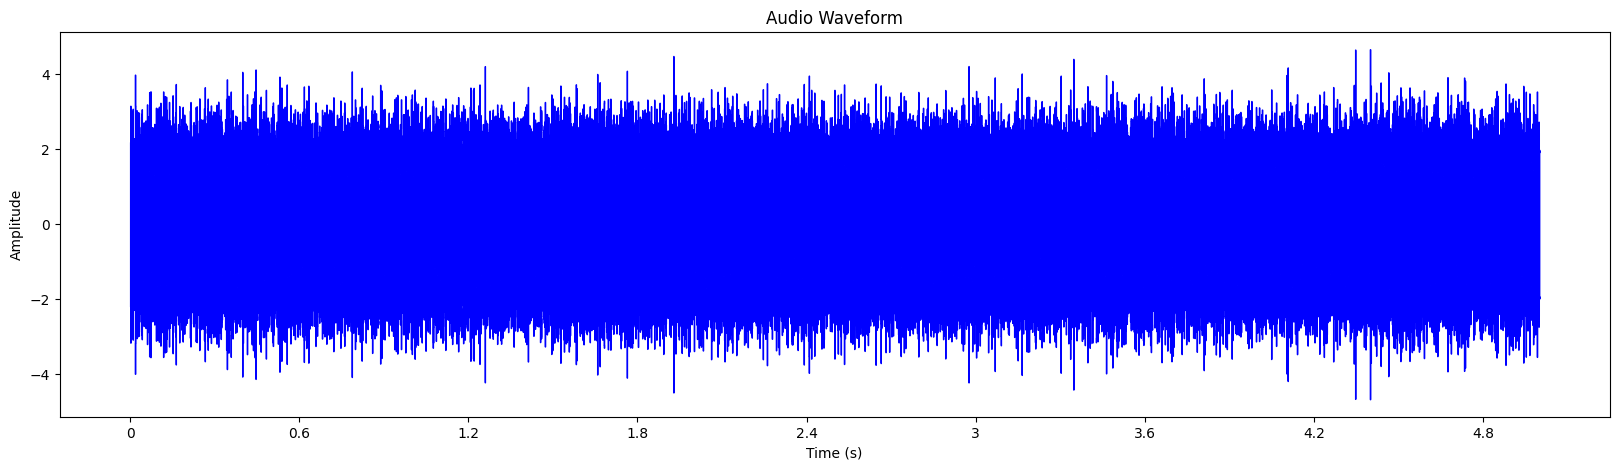

In [4]:
#Show audio waveform
plt.figure(figsize=(20, 5))
librosa.display.waveshow(y, sr=sample_rate, color="blue")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

In [11]:
# Size of the Fast Fourier Transform (FFT), which will also be used as the window length
n_fft=1024

# Step or stride between windows. If the step is smaller than the window length, the windows will overlap
hop_length=320

# Specify the window type for FFT/STFT
window_type ='hann'

# Calculate the spectrogram as the square of the complex magnitude of the STFT
spectrogram_librosa = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type)) ** 2

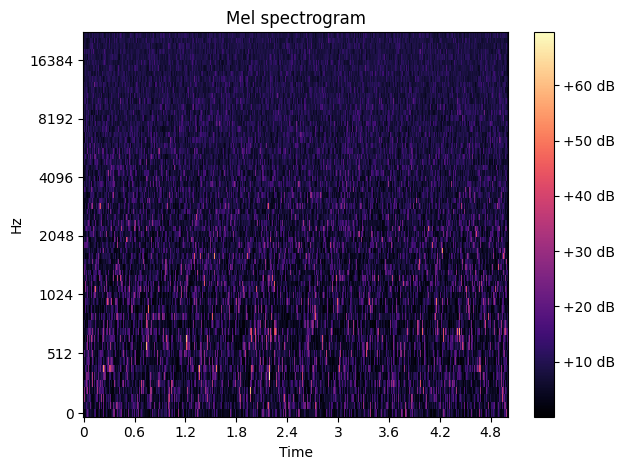

In [12]:
#Log Mel Spectrogram
mel_bins = 64 # Number of Mel bands
fmin = 0
fmax = None
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type, n_mels = mel_bins, power=2.0)


mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel spectrogram')
plt.tight_layout()
plt.show()

In [6]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sample_rate, n_mfcc=13)  # You can adjust the number of MFCC coefficients (n_mfcc)

# Save MFCCs as a CSV file
mfccs_df = pd.DataFrame(mfccs)
mfccs_df.to_csv("mfccs.csv", index=False)

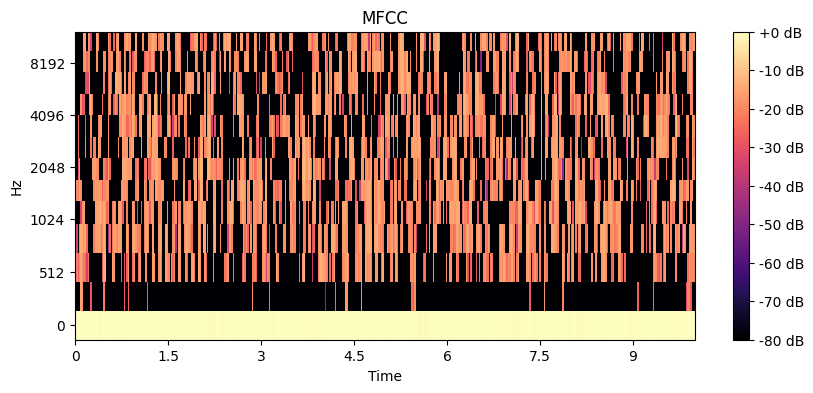

In [7]:
# Visualize the MFCCs
plt.figure(figsize=(10, 4))

librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), y_axis='mel', x_axis='time')

plt.colorbar(format='%+2.0f dB')

plt.title('MFCC')

plt.show()

In [9]:
#Computing ZERO-CROSSING RATE
# Zooming in (won't be necessary when segmentation is done)
n0 = 9000
n1 = 9100
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

109739
